# Pima Indians Diabetes

- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Introduction

I'll be using tons of header ones as to provide a better navigation in Kaggle.

## Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Features

They're pretty self-explainatory

```
- Pregnancies
- Glucose
- Blood pressure
- Skin thickness
- Insulin
- BMI (Body Mass Index)
- Diabetes pedigree function
- Age
- Outcome, 0 if negative 1 if positive
```

## References

- https://link.springer.com/article/10.1007/s00521-022-07049-z#Sec20

# Initialization

In [1]:
RANDOM_SEED = 42 #@param {type: 'integer'}

## Imports

In [2]:
import pandas as pd
import numpy as np
np.random.seed(RANDOM_SEED)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

## Load the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%pip install kaggle -q
%cp "/content/drive/MyDrive/Colab Notebooks/Kaggle/jofaval-kaggle.json" "kaggle.json"
%mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip -o pima-indians-diabetes-database.zip

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [6]:
dataframe = pd.read_csv('diabetes.csv')
dataframe.shape

(768, 9)

In [7]:
target = 'Outcome'
features = [ col for col in dataframe.columns if col not in [target] ]

In [8]:
def humanize(
  col: str
) -> str:
  if col.isupper():
    return col

  title = col[0]
  for character in col[1:]:
    if character.isupper():
      title += ' '
    title += character.lower()

  return title

_ = [ print(humanize(col)) for col in dataframe.columns ]

Pregnancies
Glucose
Blood pressure
Skin thickness
Insulin
BMI
Diabetes pedigree function
Age
Outcome


# Data Preprocessing

## Standarization

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dataframe.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


## Abnormal values

In [11]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Exploratory Data Analysis

## Age and pregnancies hypthesis

This may be curiosity more than anything else

### Age and pregnancies

And how they correlate to diabetes

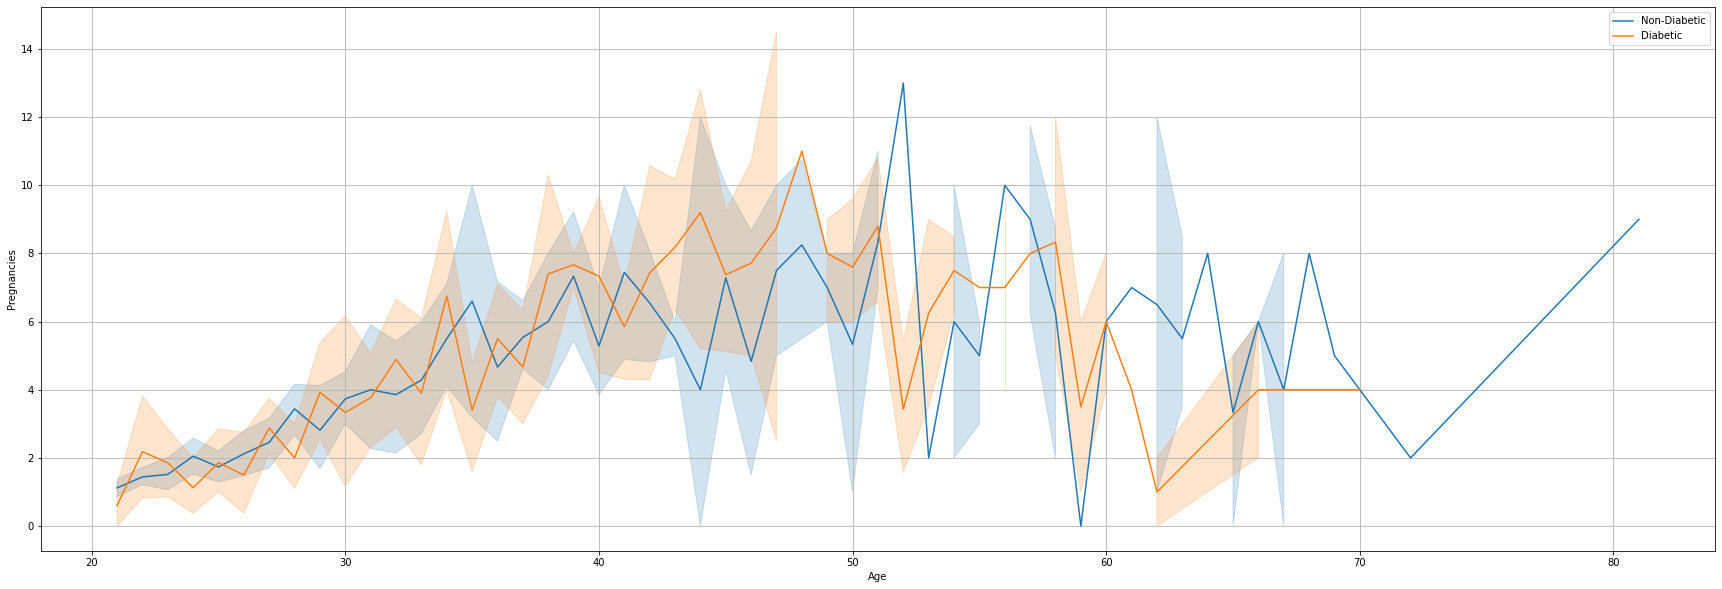

In [12]:
plt.figure(figsize=(30, 10))
plt.grid()
sns.lineplot(data=dataframe, x='Age', y='Pregnancies', hue='Outcome')
plt.legend(['Non-Diabetic', 'Diabetic'])

Middle-aged women have more pregnancies and more diabetes, but, as they gro older, the percentage of diabetes decreases, likely due to decease, but we can't really tell without private information, nor we should.

### Age distribution

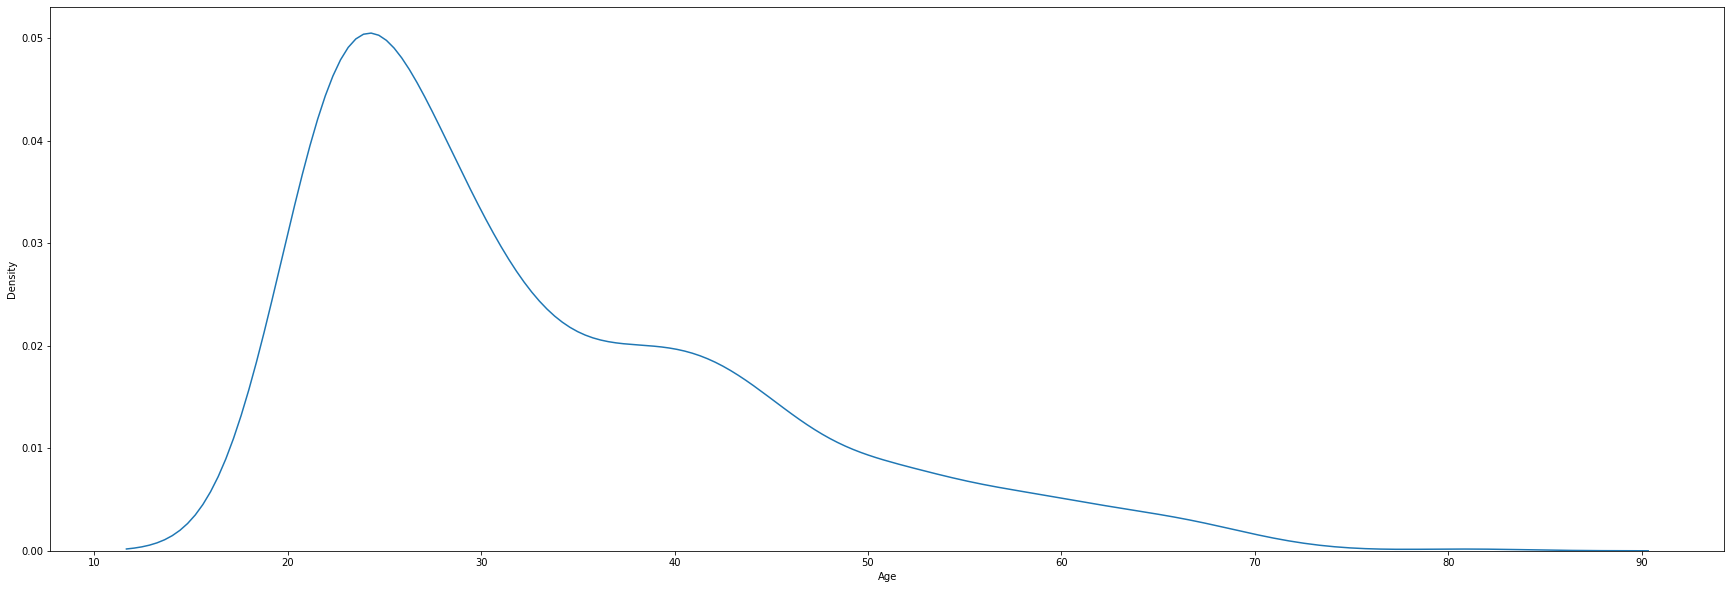

In [13]:
plt.figure(figsize=(30, 10))
sns.kdeplot(data=dataframe, x='Age')

### Younger diabetes detection

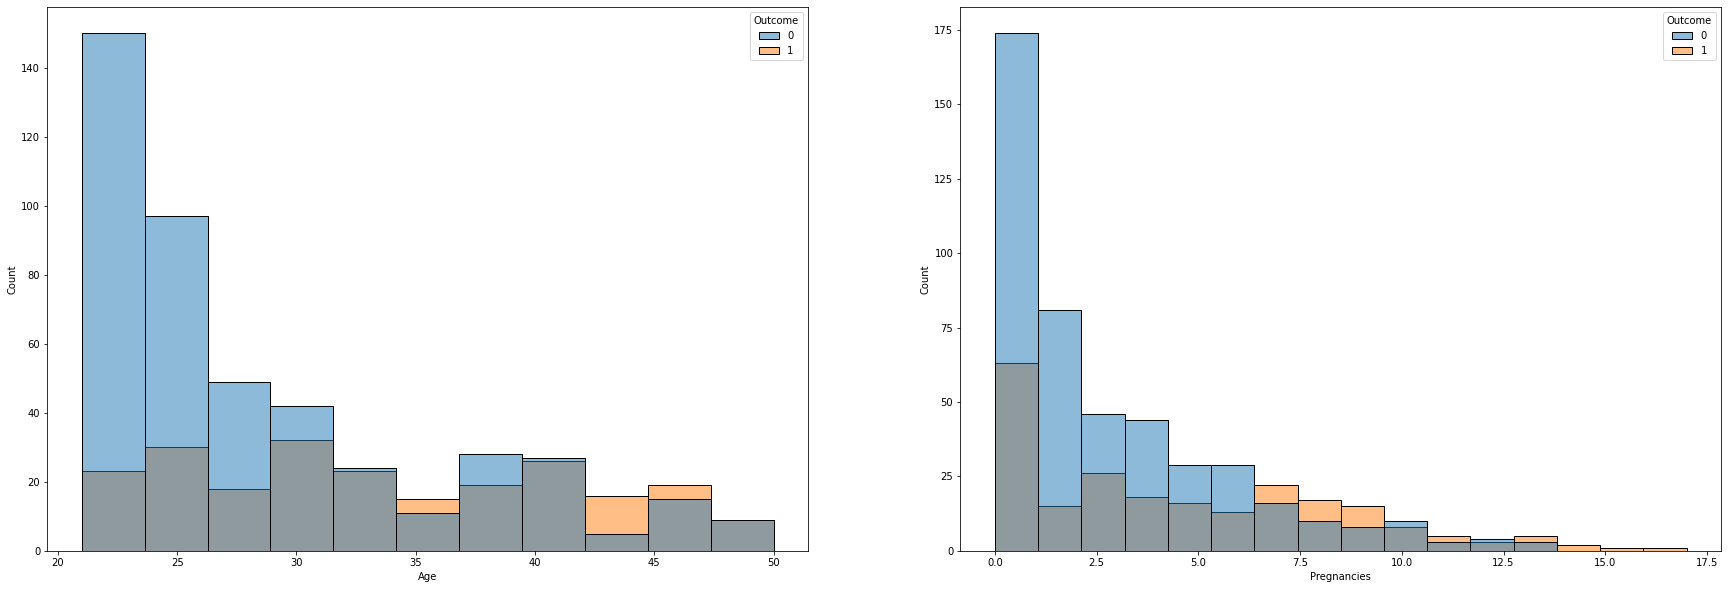

In [14]:
observation_group = dataframe[ dataframe['Age'] <= 50 ]
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.histplot(data=observation_group, x='Age', hue='Outcome', ax=axes[0])
sns.histplot(data=observation_group, x='Pregnancies', hue='Outcome', ax=axes[1])

## Data Distribution

The variability of the data

I'd rather remove values out of scope, than to mutate them, to create/modify data with fake values is risky, too risky, and we're talking about lifes here, not just numbes.

In [15]:
REMOVE_OUTLIERS = True #@param {type:'boolean'}

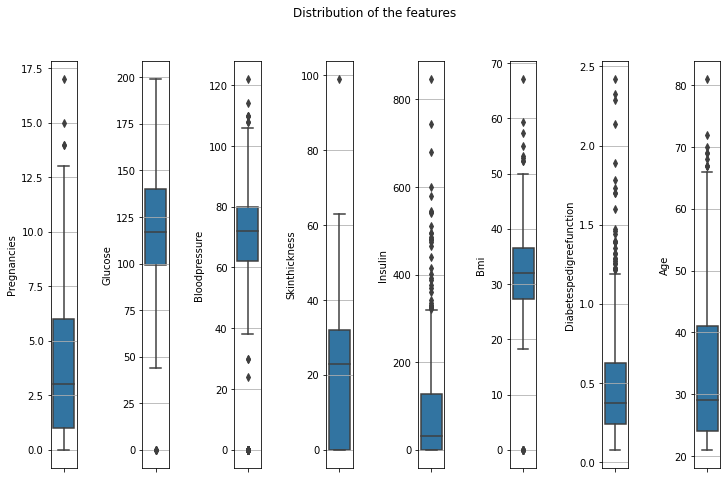

In [16]:
columns = features
# columns = dataframe.columns
n_columns = len(columns)
fig, axes = plt.subplots(1, n_columns, figsize=(1.5 * n_columns, 7.5))
fig.suptitle('Distribution of the features')
plt.subplots_adjust(wspace=2.5)
for index, col in enumerate(columns):
  ax = axes[int(index % n_columns)]
  ax.grid()
  sns.boxplot(data=dataframe, y=col, ax=ax)
  ax.set_ylabel(col.title())

### Outlier handling

Let us remove the abnormal values that we found, outliers way too out of scope

Using scipy, as per:

https://stackoverflow.com/questions/45386955/python-replacing-outliers-values-with-median-values#answer-71217012

That referenced:

https://www.adamsmith.haus/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

In [17]:
if REMOVE_OUTLIERS:
  import scipy

  z_scores = scipy.stats.zscore(dataframe)

  abs_z_scores = np.abs(z_scores)
  filtered_entries = (abs_z_scores < 3).all(axis=1)
  dataframe = dataframe[filtered_entries]

A more manual way if you'd like

In [18]:
if REMOVE_OUTLIERS:
  dataframe = dataframe[ dataframe['Glucose'] > 0 ]
  dataframe = dataframe[ dataframe['BloodPressure'] > 0 ]
  dataframe = dataframe[ dataframe['BMI'] > 0 ]
  # dataframe = dataframe[ dataframe['SkinThickness'] < 80 ]

### Reevaluation

So we now have a cleaner distribution

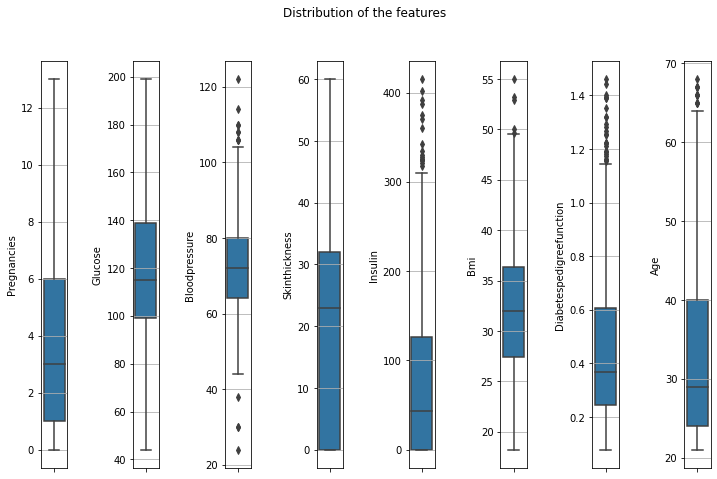

In [19]:
columns = features
# columns = dataframe.columns
n_columns = len(columns)
fig, axes = plt.subplots(1, n_columns, figsize=(1.5 * n_columns, 7.5))
fig.suptitle('Distribution of the features')
plt.subplots_adjust(wspace=2.5)
for index, col in enumerate(columns):
  ax = axes[int(index % n_columns)]
  ax.grid()
  sns.boxplot(data=dataframe, y=col, ax=ax)
  ax.set_ylabel(col.title())

## Correlation

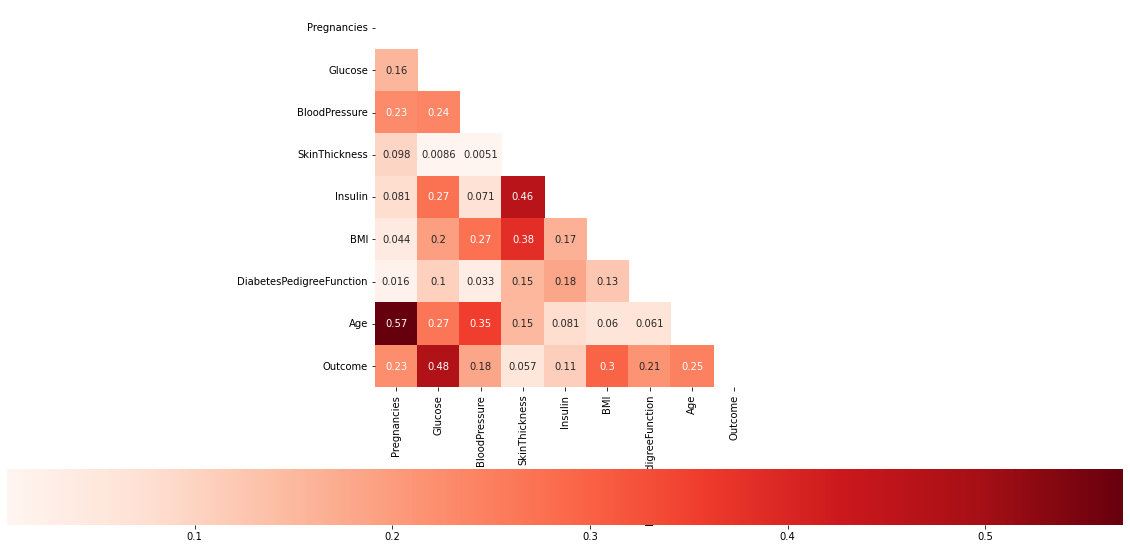

In [20]:
correlation = dataframe.corr().abs()
matrix = np.triu(correlation)

plt.figure(figsize=(20, 10))
_ = sns.heatmap(
  correlation,
  square=True,
  annot=True,
  cmap='Reds',
  cbar=True,
  cbar_kws={'orientation': 'horizontal'},
  mask=matrix,
)
plt.show()

# Data Science

## Imports

In [21]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, PolynomialFeatures
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score

## Assignment

In [22]:
X = dataframe[features]
y = dataframe[target]

## Imbalancement

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


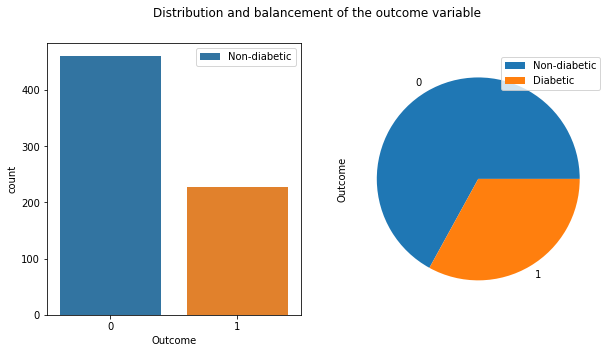

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribution and balancement of the outcome variable')

sns.countplot(y, ax=axes[0])
axes[0].legend(['Non-diabetic', 'Diabetic'])

y.value_counts().plot.pie(ax=axes[1])
axes[1].legend(['Non-diabetic', 'Diabetic'])

In [24]:
from imblearn.under_sampling import RandomUnderSampler
X, y = RandomUnderSampler(random_state=RANDOM_SEED).fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


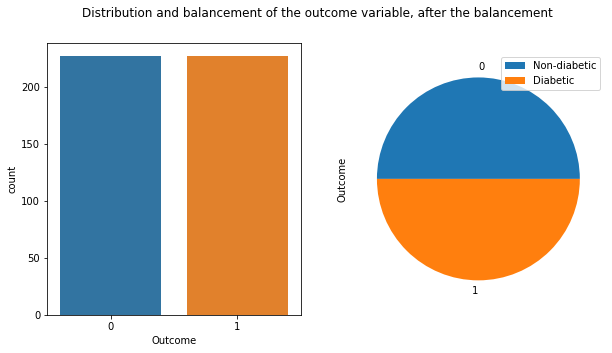

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribution and balancement of the outcome variable, after the balancement')

sns.countplot(y, ax=axes[0])
# axes[0].legend(['Non-diabetic', 'Diabetic'])

y.value_counts().plot.pie(ax=axes[1])
axes[1].legend(['Non-diabetic', 'Diabetic'])

## Splitting

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED, stratify=y)

# Helpers

## Confusion Matrix

In [27]:
default_target_names = ['Non-Diabetic', 'Diabetic']

def cmatrix(
  y_test,
  y_pred,
  cmap: str = 'Blues',
  target_names: List[str] = default_target_names,
  title: str = 'Example',
  figsize: Tuple[int, int] = (20, 10)
) -> np.ndarray:
  df_cm = confusion_matrix(y_test, y_pred)
  df_cm = df_cm.astype('float') / df_cm.sum(axis = 1)[:, np.newaxis]

  plt.figure(figsize=figsize)
  _ = sns.heatmap(
    df_cm,
    square=True,
    annot=True,
    annot_kws={'fontsize': 14},
    cmap=cmap,
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=True,
    cbar_kws={'orientation': 'horizontal'},
  ).set(
    xlabel='Predicted Class',
    ylabel='Actual Class',
    title=f'{title} - Confusion Matrix'
  )
  plt.show()

## AUC Curve

In [28]:
def auc(
  model: Pipeline = None,
  data: pd.DataFrame = X_test,
  y_true: np.ndarray = y_test,
  probs: np.ndarray = None
) -> float:
  assert model is not None or probs is not None

  if probs is None:
    probs = model.predict_proba(data)[:, 1]

  return roc_auc_score(y_true, probs)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf_log = make_pipeline(
  # MinMaxScaler(),
  # StandardScaler(),
  MaxAbsScaler(),
  PolynomialFeatures(2),
  LogisticRegression(
    random_state=RANDOM_SEED,
  )
)
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)

print('normal', clf_log.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_log))
print('auc', auc(clf_log))

normal 0.7582417582417582
balanced 0.7577294685990339
auc 0.8454106280193237


In [30]:
clf_log.score(X, y)

0.7400881057268722

### Confusion Matrix

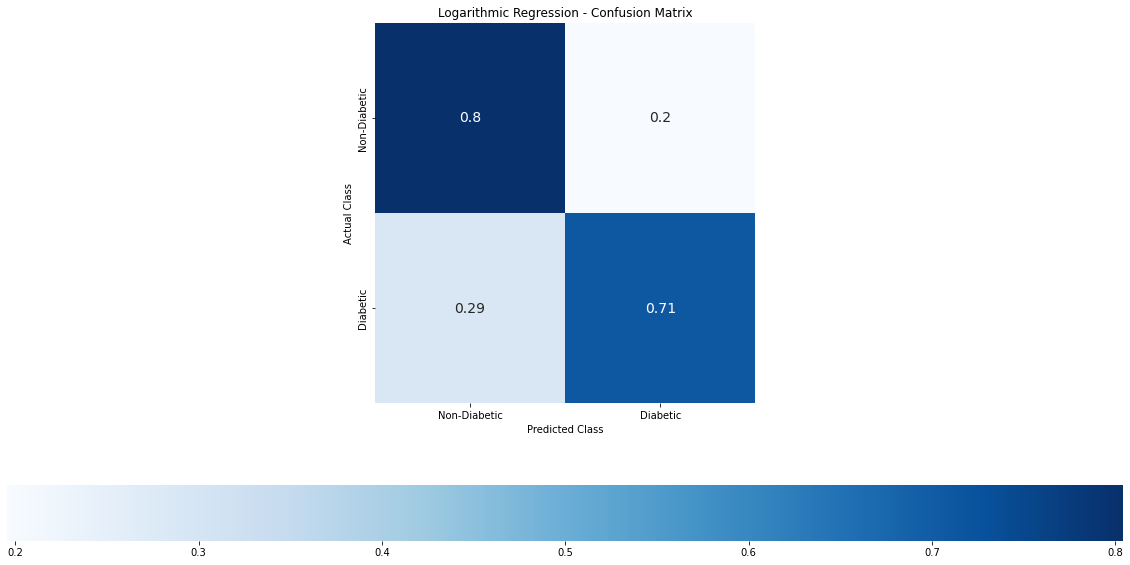

In [31]:
cmatrix(y_test, y_pred_log, title='Logarithmic Regression')

# XGBoost

In [32]:
from xgboost import XGBClassifier

clf_xgboost = make_pipeline(
  # MinMaxScaler(),
  # StandardScaler(),
  MaxAbsScaler(),
  PolynomialFeatures(3),
  XGBClassifier(
    random_state=RANDOM_SEED,
    # n_estimators=5,
    # max_depth=7,
    # learning_rate=.01,
    # This will give higher score on the test set, but kinda cheating
    # subsample=.05,
    # colsample_bytree=.8,
  )
)
clf_xgboost.fit(X_train, y_train)
y_pred_xgboost = clf_xgboost.predict(X_test)

print('normal', clf_xgboost.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_xgboost))
print('auc', auc(clf_xgboost))

normal 0.7472527472527473
balanced 0.7468599033816425
auc 0.8053140096618358


In [33]:
clf_xgboost.score(X, y)

0.9427312775330396

## Confusion Matrix

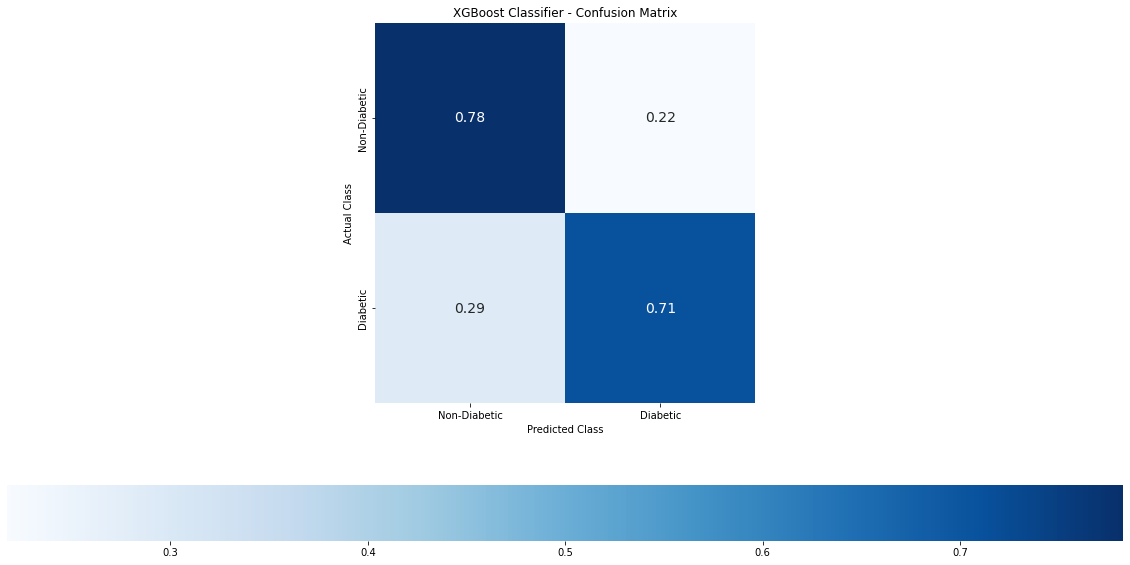

In [34]:
cmatrix(y_test, y_pred_xgboost, title='XGBoost Classifier')

# Neural network

In [35]:
import tensorflow as tf

def build_tf_model() -> tf.keras.Sequential:
  model = tf.keras.Sequential(
    name='Diabetes-Detection-Classifier',
    layers=[
      tf.keras.layers.Dense(units=256, input_dim=X.shape[1], name='Input-Layer'),
      tf.keras.layers.Dense(units=128, name='Hidden-Layer'),
      tf.keras.layers.Dense(units=64, name='Second-Hidden-Layer'),
      tf.keras.layers.Dense(units=1, activation='sigmoid', name='Output-Layer'),
    ]
  )

  model.compile(
    loss=tf.losses.binary_crossentropy,
    optimizer=tf.optimizers.Adam(learning_rate=.001),
    metrics=['accuracy']
  )

  model.summary()

  return model

In [36]:
tf_model = build_tf_model()
history = tf_model.fit(
  X_train,
  y_train,
  validation_split=.1,
  epochs=100,
  # callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
)

Model: "Diabetes-Detection-Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (Dense)         (None, 256)               2304      
                                                                 
 Hidden-Layer (Dense)        (None, 128)               32896     
                                                                 
 Second-Hidden-Layer (Dense)  (None, 64)               8256      
                                                                 
 Output-Layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 2s 45ms/step - loss: 8.5284 - accuracy: 0.4479 - val_loss: 7.3186 - val_accuracy: 0.5135
Epoch 2/100
11/11 [====

In [37]:
y_pred_tf = tf_model.predict(X_test).reshape(1, -1)[0]
y_pred_tf = np.vectorize(round)(y_pred_tf)

_, tf_accuracy = tf_model.evaluate(X_test, y_test)
print('normal', tf_accuracy)
print('balanced', balanced_accuracy_score(y_test, y_pred_tf))
print('auc', auc(probs=tf_model.predict(X_test)[:, -1]))

3/3 [==============================] - 0s 6ms/step - loss: 0.6275 - accuracy: 0.6593
normal 0.6593406796455383
balanced 0.6615942028985508
auc 0.766183574879227


In [38]:
tf_model.evaluate(X, y)

15/15 [==============================] - 0s 4ms/step - loss: 0.6217 - accuracy: 0.6432


[0.6217020750045776, 0.6431717872619629]

## Confusion Matrix

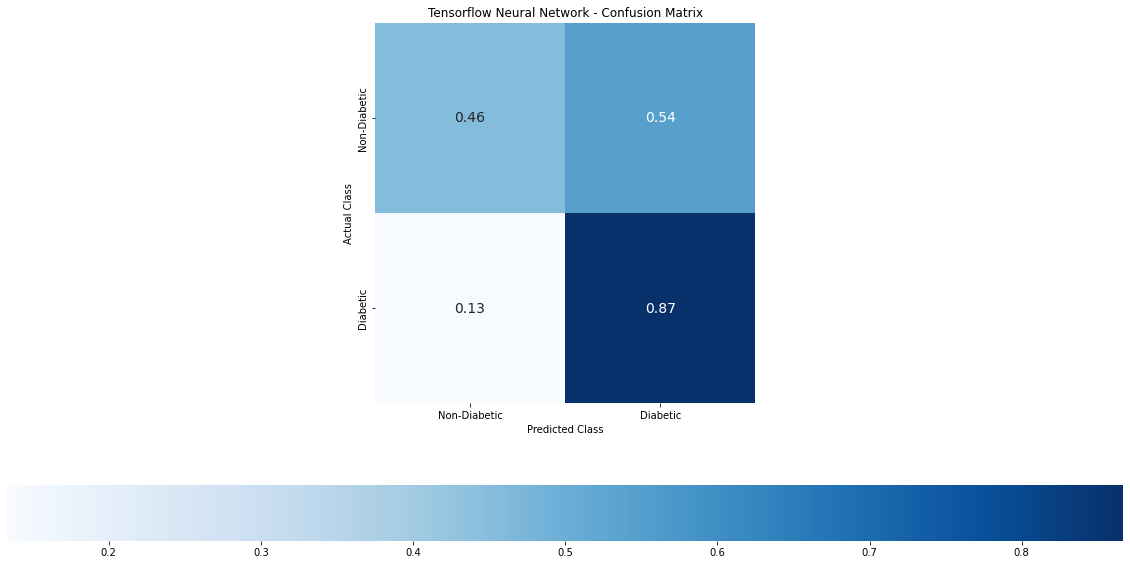

In [39]:
cmatrix(y_test, y_pred_tf, title='Tensorflow Neural Network')

# Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

clf_bayes = make_pipeline(
  MinMaxScaler(),
  GaussianNB(
    var_smoothing=.01
  )
)
clf_bayes.fit(X_train, y_train)
y_pred_bayes = clf_bayes.predict(X_test)

print('normal', clf_bayes.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_bayes))
print('auc', auc(clf_bayes))

normal 0.7912087912087912
balanced 0.7905797101449274
auc 0.8444444444444444


In [41]:
clf_bayes.score(X, y)

0.7444933920704846

## Confusion Matrix

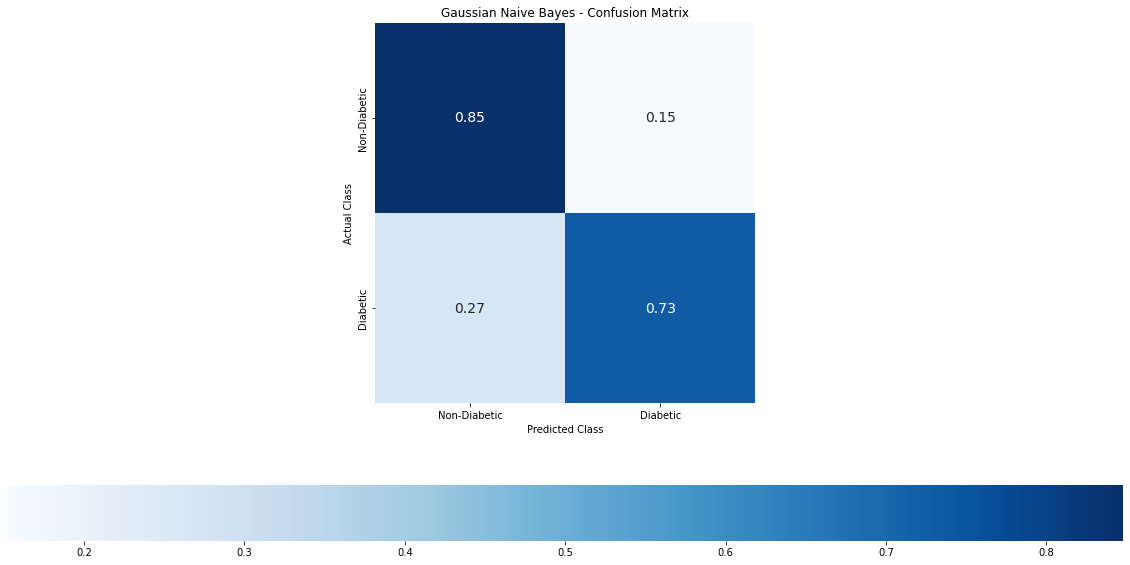

In [42]:
cmatrix(y_test, y_pred_bayes, title='Gaussian Naive Bayes')

# K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = make_pipeline(
  MinMaxScaler(),
  # KNeighborsClassifier(n_neighbors=23)
  KNeighborsClassifier(n_neighbors=3)
)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

print('normal', clf_knn.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_knn))
print('auc', auc(clf_knn))

normal 0.7802197802197802
balanced 0.7801932367149759
auc 0.798792270531401


In [44]:
clf_knn.score(X, y)

0.8127753303964758

## Best number of neighbors

In [45]:
number_of_neighbors = range(1, 100, 1) # El número de iteraciones que queremos hacer.
sample_knn = list(map(
  lambda n_neighbors: make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=n_neighbors)
  ),
  number_of_neighbors
))
knn_neighbors_scores = list(map(
  lambda index: sample_knn[index].fit(X_train, y_train).score(X_test, y_test),
  range(len(sample_knn))
))

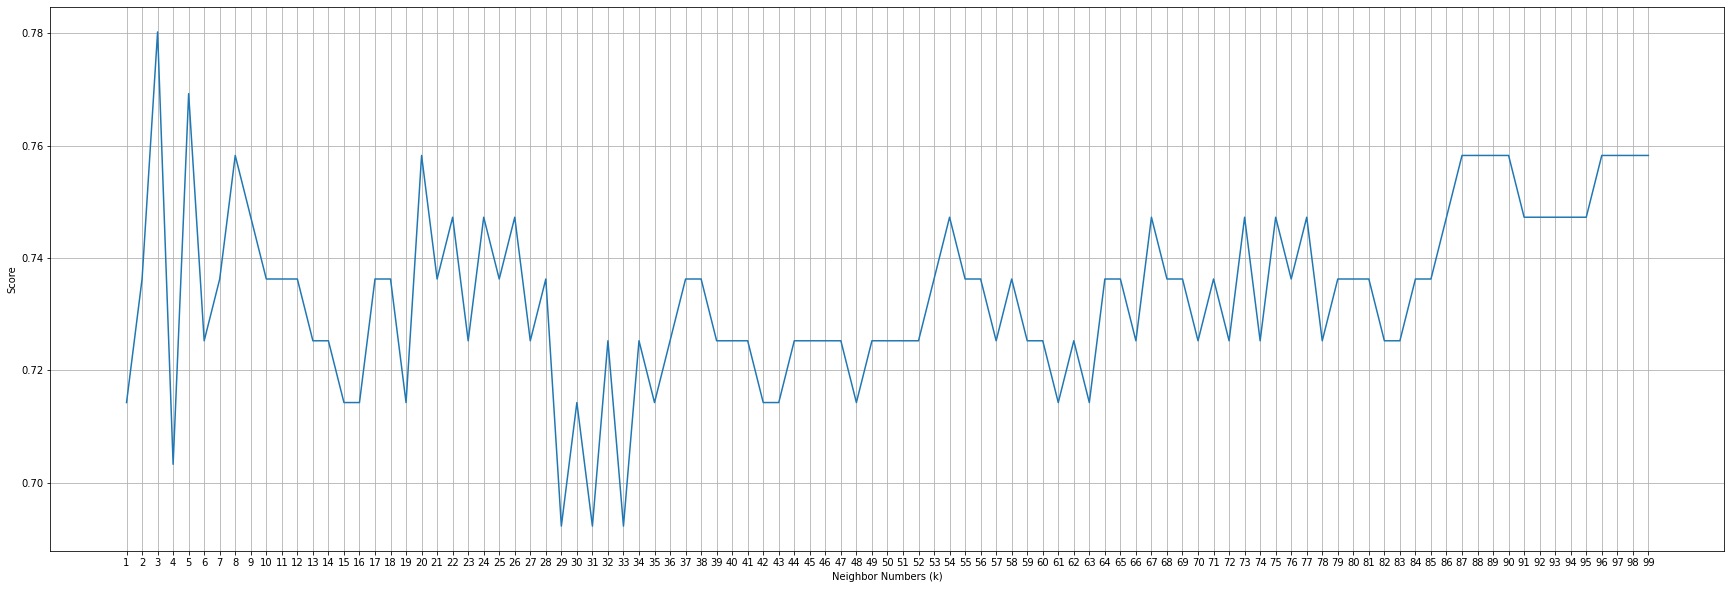

In [46]:
plt.figure(figsize=(30, 10))
plt.xticks(number_of_neighbors)

plt.xlabel('Neighbor Numbers (k)')
plt.ylabel('Score')

plt.grid()
plt.xticks(number_of_neighbors)
_ = plt.plot(number_of_neighbors, knn_neighbors_scores)
plt.show()

## Confusion Matrix

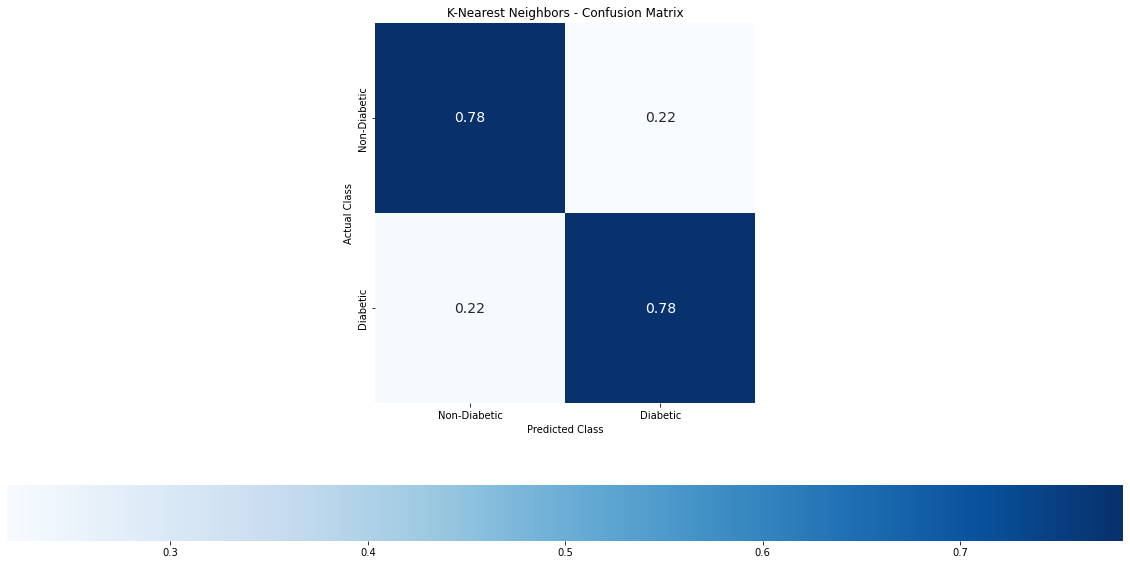

In [47]:
cmatrix(y_test, y_pred_knn, title='K-Nearest Neighbors')

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = make_pipeline(
  MinMaxScaler(),
  RandomForestClassifier(
    random_state=RANDOM_SEED,
    # n_estimators=700,
    max_depth=75,
  )
)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print('normal', clf_rf.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_rf))
print('auc', auc(clf_rf))

normal 0.8461538461538461
balanced 0.846135265700483
auc 0.8727053140096618


In [49]:
clf_rf.score(X, y)

0.9691629955947136

## Confusion Matrix

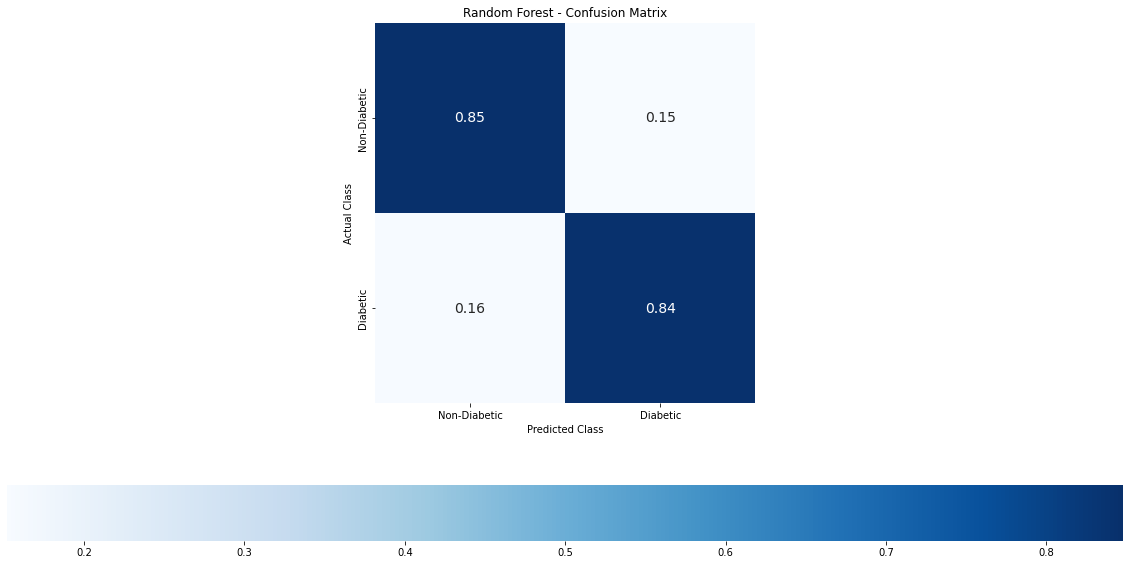

In [50]:
cmatrix(y_test, y_pred_rf, title='Random Forest')

# Support Vector Machine

In [51]:
from sklearn.svm import SVC

clf_svc = make_pipeline(
  MinMaxScaler(),
  SVC(random_state=RANDOM_SEED, C=1.0, probability=True)
)
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)

print('normal', clf_svc.score(X_test, y_test))
print('balanced', balanced_accuracy_score(y_test, y_pred_svc))
print('auc', auc(clf_svc))

normal 0.7472527472527473
balanced 0.7471014492753623
auc 0.8321256038647343


In [52]:
clf_svc.score(X, y)

0.7797356828193832

## Confusion Matrix

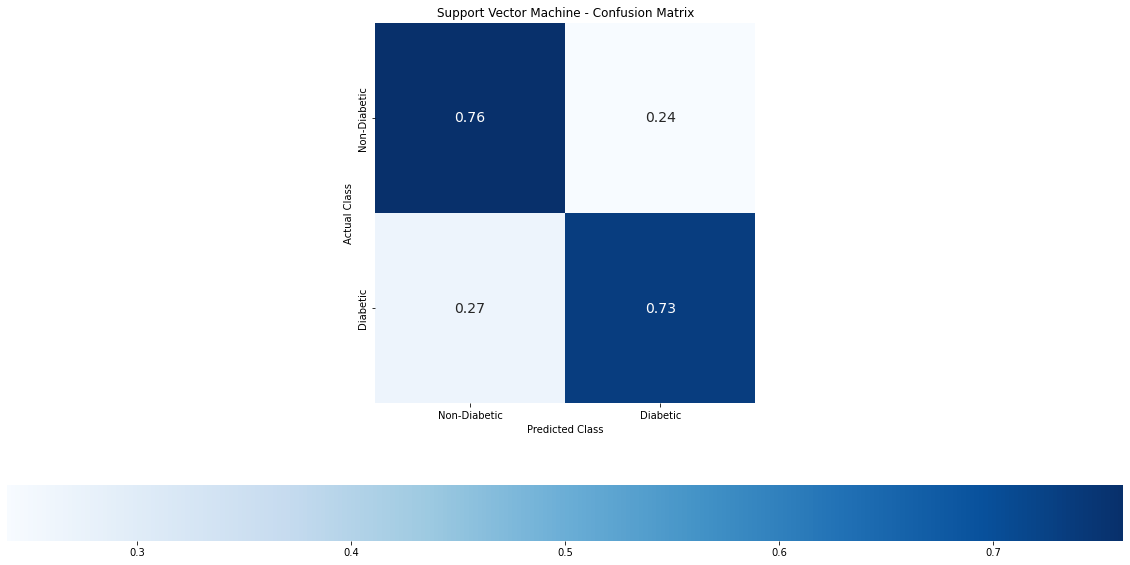

In [53]:
cmatrix(y_test, y_pred_svc, title='Support Vector Machine')